In [4]:
try:
    print("ab")
    print(a)
    print("ab")
except:
    pass

ab


In [6]:
try:
    print("ab")
    print(a)
    print("ab")
except Exception as e:
    print(str(e))

ab
name 'a' is not defined


In [52]:
import requests as req
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = req.get(url)

In [53]:
response.status_code

200

In [3]:
t = response.text

In [51]:
ind = t.index('S&P 500 component stocks')

In [23]:
print(ind)

19432


In [25]:
t[ind:ind+2000]

'S&P 500 component stocks</div>\n\t\t</a>\n\t\t\n\t\t<ul id="toc-S&amp;P_500_component_stocks-sublist" class="vector-toc-list">\n\t\t</ul>\n\t</li>\n\t<li id="toc-Selected_changes_to_the_list_of_S&amp;P_500_components"\n\t\tclass="vector-toc-list-item vector-toc-level-1 vector-toc-list-item-expanded">\n\t\t<a class="vector-toc-link" href="#Selected_changes_to_the_list_of_S&amp;P_500_components">\n\t\t\t<div class="vector-toc-text">\n\t\t\t<span class="vector-toc-numb">2</span>Selected changes to the list of S&P 500 components</div>\n\t\t</a>\n\t\t\n\t\t<ul id="toc-Selected_changes_to_the_list_of_S&amp;P_500_components-sublist" class="vector-toc-list">\n\t\t</ul>\n\t</li>\n\t<li id="toc-See_also"\n\t\tclass="vector-toc-list-item vector-toc-level-1 vector-toc-list-item-expanded">\n\t\t<a class="vector-toc-link" href="#See_also">\n\t\t\t<div class="vector-toc-text">\n\t\t\t<span class="vector-toc-numb">3</span>See also</div>\n\t\t</a>\n\t\t\n\t\t<ul id="toc-See_also-sublist" class="vector

In [5]:
from bs4 import BeautifulSoup

In [54]:
soup = BeautifulSoup(t,features="html.parser")

In [82]:
table = soup.findAll('table')

In [83]:
# table1 = (table[0].text)
table = table[0].text

In [84]:
table

"\n\nSymbol\n\nSecurity\nGICS Sector\nGICS Sub-Industry\nHeadquarters Location\nDate added\nCIK\nFounded\n\n\nMMM\n\n3M\nIndustrials\nIndustrial Conglomerates\nSaint Paul, Minnesota\n1957-03-04\n0000066740\n1902\n\n\nAOS\n\nA. O. Smith\nIndustrials\nBuilding Products\nMilwaukee, Wisconsin\n2017-07-26\n0000091142\n\n1916\n\n\nABT\n\nAbbott\nHealth Care\nHealth Care Equipment\nNorth Chicago, Illinois\n1957-03-04\n0000001800\n1888\n\n\nABBV\n\nAbbVie\nHealth Care\nPharmaceuticals\nNorth Chicago, Illinois\n2012-12-31\n0001551152\n2013 (1888)\n\n\nACN\n\nAccenture\nInformation Technology\nIT Consulting & Other Services\nDublin, Ireland\n2011-07-06\n0001467373\n1989\n\n\nATVI\n\nActivision Blizzard\nCommunication Services\nInteractive Home Entertainment\nSanta Monica, California\n2015-08-31\n0000718877\n2008\n\n\nADM\n\nADM\nConsumer Staples\nAgricultural Products & Services\nChicago, Illinois\n1957-03-04\n0000007084\n\n1902\n\n\nADBE\n\nAdobe Inc.\nInformation Technology\nApplication Softwa

In [85]:
table2 = table.split('\n\n')

In [28]:
# # table3 = [ele for ele in table2 if ele!='']
# table3 = table2[0].copy()

In [89]:
table3 = [row.splitlines() for row in table2]


In [116]:
# table3

In [114]:
data = []


In [37]:
import tqdm
from tqdm  import trange

In [38]:
data=[]
for i in trange(0,len(table3),11):
    data.append(table3[i+2:i+11])
    

100%|█████████████████████████████████████████████████████████████████████████████| 514/514 [00:00<00:00, 46851.51it/s]


In [47]:
data[101]

['',
 'CDW',
 '',
 'CDW',
 'Information Technology',
 'Technology Distributors',
 'Lincolnshire, Illinois',
 '2019-09-23',
 '0001402057']

In [44]:
data[1]

['MMM',
 '',
 '3M',
 'Industrials',
 'Industrial Conglomerates',
 'Saint Paul, Minnesota',
 '1957-03-04',
 '0000066740',
 '1902']

In [74]:
import pandas as pd

In [124]:
df = pd.DataFrame(data[1:], columns=data[0])

In [144]:
df.tail(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
492,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,0001140536,2016,GWW,W. W. Grainger
493,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,0000277135,1927,WYNN,Wynn Resorts
494,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,0001174922,2002,XEL,Xcel Energy
495,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,0000072903,1909,XYL,Xylem Inc.
496,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,0001524472,2011,YUM,Yum! Brands
497,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997,ZBRA,Zebra Technologies
498,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969,ZBH,Zimmer Biomet
499,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927,ZION,Zions Bancorporation
500,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873,ZTS,Zoetis
501,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,0001555280,1952,None,None


<AxesSubplot:>

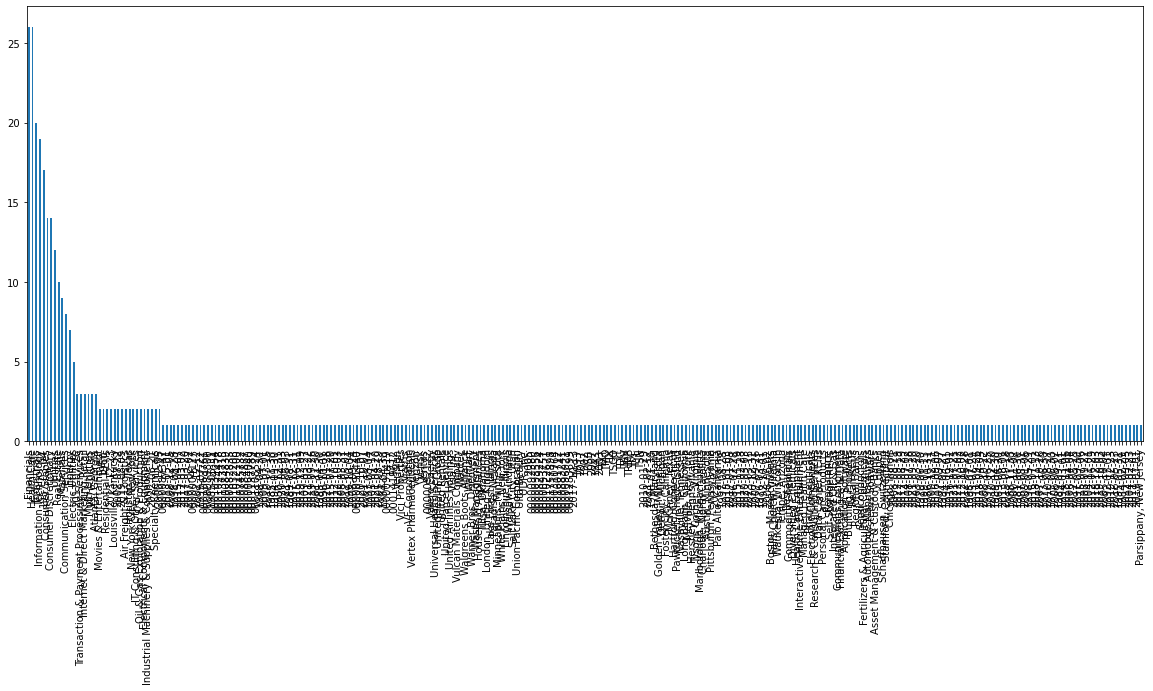

In [142]:

df['GICS Sector'].value_counts().plot.bar(figsize=(20,8))

In [143]:
df['GICS Sector'].value_counts()

Financials                26
Health Care               26
Industrials               20
Information Technology    19
1957-03-04                17
                          ..
2012-09-05                 1
2004-02-23                 1
2011-07-01                 1
2019-07-01                 1
Parsippany, New Jersey     1
Name: GICS Sector, Length: 299, dtype: int64